In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [16]:
# Load the data from the uploaded CSV file
data = pd.read_csv('Data/heart.csv')

# Check first few rows
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Replace missing values with mean
X = X.fillna(X.mean())

# One-hot encode categorical variables
categorical_features = ['cp', 'restecg', 'slope', 'thal']
onehot = OneHotEncoder(sparse_output=False)  # Updated sparse argument
encoded_features = onehot.fit_transform(X[categorical_features])

# Create a new dataframe with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=onehot.get_feature_names_out(categorical_features))

# Concatenate encoded features with other features
X = pd.concat([X.drop(categorical_features, axis=1).reset_index(drop=True), encoded_df], axis=1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X.shape, y.shape


((1025, 23), (1025,))

In [18]:
def build_1d_cnn_model(input_shape, num_classes):
    model = Sequential([
        Embedding(input_dim=input_shape[1], output_dim=300, input_length=input_shape[1]),
        Dropout(0.3),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='sigmoid')
    ])
    return model


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = build_1d_cnn_model(input_shape=X_train.shape, num_classes=1)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


c:\VS code\IDP\IDP\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.5387 - loss: 0.6898 - val_accuracy: 0.7256 - val_loss: 0.6618
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7628 - loss: 0.6035 - val_accuracy: 0.6768 - val_loss: 0.6431
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8186 - loss: 0.4556 - val_accuracy: 0.7439 - val_loss: 0.5976
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8000 - loss: 0.4637 - val_accuracy: 0.7561 - val_loss: 0.5585
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8105 - loss: 0.4271 - val_accuracy: 0.7622 - val_loss: 0.5190
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8158 - loss: 0.3792 - val_accuracy: 0.7683 - val_loss: 0.5280
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8316 - loss: 0.3972 - val_accuracy: 0.7988 - val_loss: 0.4732
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8285 - loss: 0.3769 - val_accuracy: 0.7805 - 

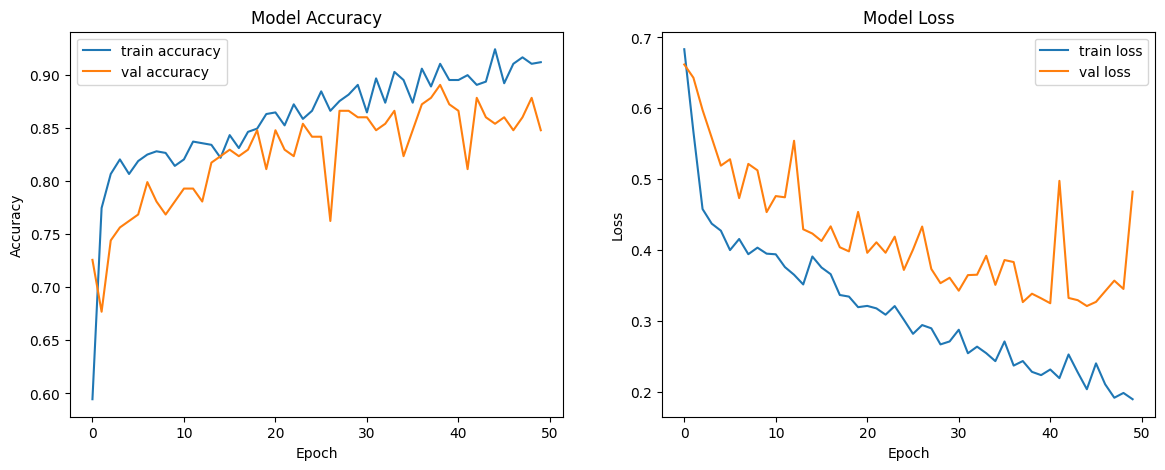

In [20]:
# Plot training & validation accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='train accuracy')
ax1.plot(history.history['val_accuracy'], label='val accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['val_loss'], label='val loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.show()

Test accuracy: 0.8780
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

Confusion Matrix:
[[96  6]
 [19 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       102
           1       0.93      0.82      0.87       103

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205

Accuracy Score: 0.8780


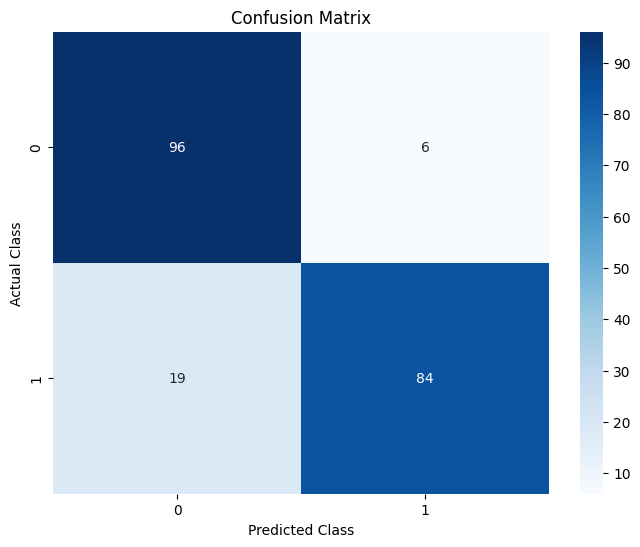

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
